<a href="https://colab.research.google.com/github/mohammed893/API_image_TF_MODEL/blob/main/FCI_Project_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install opendatasets

In [5]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/adityakomaravolu/brain-tumor-mri-images?resource=download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohammed165
Your Kaggle Key: ··········


100%|██████████| 175M/175M [00:01<00:00, 120MB/s]


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import plotly.graph_objects as go
import plotly.express as px
import tensorflow as tf
# Display
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import callbacks

import matplotlib.pyplot as plt
os.environ["KERAS_BACKEND"] = "tensorflow"


In [7]:
train_dir= 'brain-tumor-mri-images/archive (5)/Training'
test_dir = 'brain-tumor-mri-images/archive (5)/Testing'

batch_size = 32
img_height = 224
img_width = 224

In [90]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode= 'int'
)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.


In [9]:
val_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode= 'int'
)

Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


In [10]:
class_names= train_data.class_names
print(class_names)

['glioma', 'meningioma', 'notumor', 'pituitary']


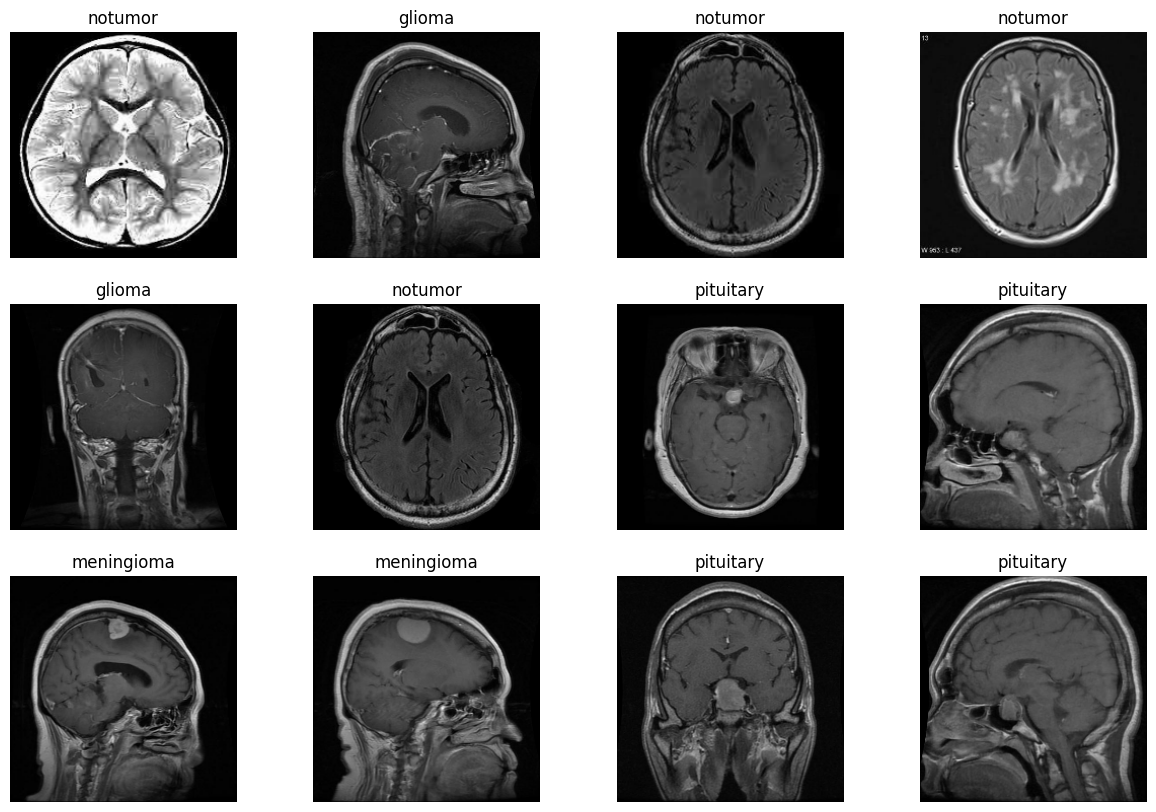

In [91]:
plt.figure(figsize=(15, 10))
for images, labels in train_data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [12]:
meningioma = 0
notumor = 0
glioma = 0
pituitary = 0

for images, labels in train_data:
    for i in range(len(images)):
        #print(class_names[labels[i]])
        if class_names[labels[i]] == 'meningioma':
            meningioma +=1
        elif class_names[labels[i]] == 'notumor':
            notumor +=1
        elif class_names[labels[i]] == 'glioma':
            glioma +=1
        elif class_names[labels[i]] == 'pituitary':
            pituitary +=1


print('meningioma : ', meningioma)
print('glioma : ', glioma)
print('pituitary : ', pituitary)
print('notumor : ', notumor)

meningioma :  1090
glioma :  1077
pituitary :  1156
notumor :  1247


In [ ]:
fig=px.pie(values = [meningioma+glioma+pituitary,notumor], names=['tumor','notumor'],hole=0.425)
fig.update_layout(title='Brain Tumor Distribution',font_size=15,title_x=0.45,annotations=[dict(text='BrainTumor',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x= [meningioma,glioma,pituitary,notumor],
            y= ['meningioma','glioma','pituitary','notumor'],
            orientation='h'))

fig.update_layout(title='Brain Tumor Distribution',font_size=15,title_x=0.45)


fig.show()

In [ ]:
fig=px.pie(values = [meningioma,glioma,pituitary,notumor], names=['meningioma','glioma','pituitary','notumor'],hole=0.425)
fig.update_layout(title='Brain Tumor Distribution',font_size=15,title_x=0.45,annotations=[dict(text='BrainTumor',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

#Training a CNN on all the data without Data augmentation Or Transfer Learning

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

trainDataGenerator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
testDataGenerator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_d = trainDataGenerator.flow_from_directory(
     "brain-tumor-mri-images/archive (5)/Training",
      classes=['glioma','meningioma','notumor','pituitary'],
      color_mode="rgb",
      batch_size=16,
      target_size=(64,64),
      class_mode="categorical",
      subset="training")


Found 4571 images belonging to 4 classes.


In [ ]:
valid_d = trainDataGenerator.flow_from_directory(
    "brain-tumor-mri-images/archive (5)/Training",
    classes=['glioma','meningioma','notumor','pituitary'],
    color_mode="rgb",
    batch_size=16,
    target_size=(64,64),
    class_mode="categorical",
    subset="validation"
)

Found 1141 images belonging to 4 classes.


In [ ]:
test_d = testDataGenerator.flow_from_directory(
    "brain-tumor-mri-images/archive (5)/Testing",
    classes = ['glioma','meningioma','notumor','pituitary'],
    color_mode="rgb",
    target_size=(64,64))

Found 1311 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import callbacks

import matplotlib.pyplot as plt

In [ ]:
Model_1_Normal_CNN = tf.keras.Sequential([
    Conv2D(64 * 64 , 3 , input_shape = (64 , 64 , 3), padding = "same" , activation = "relu"),
    MaxPooling2D(pool_size = (2 , 2)),
    Conv2D(64 , 3 , padding = "same" , activation = "relu"),
    Dropout(rate=0.4),
    MaxPooling2D(2),
    Conv2D(32 , 3 , padding = "same" , activation = "relu"),
    Dropout(rate = 0.2),
    MaxPooling2D(2),
    Flatten(),
    Dense(16 , activation = "relu"),
    Dropout(rate = 0.2),
    Dense(4 , activation = "softmax"),
])

In [ ]:
Model_1_Normal_CNN.compile(loss = "binary_crossentropy",
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["accuracy"]
                           )
callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8,monitor="val_accuracy",patience=3)
]

In [ ]:
history_1_CNN = Model_1_Normal_CNN.fit(train_d,validation_data=valid_d,epochs=5,verbose=1,callbacks=callback_list)

Epoch 1/5
286/286 [==============================] - 57s 164ms/step - loss: 0.3886 - accuracy: 0.6259 - val_loss: 0.4372 - val_accuracy: 0.6389 - lr: 0.0010
Epoch 2/5
286/286 [==============================] - 41s 143ms/step - loss: 0.2600 - accuracy: 0.7716 - val_loss: 0.3391 - val_accuracy: 0.7555 - lr: 0.0010
Epoch 3/5
286/286 [==============================] - 41s 142ms/step - loss: 0.2291 - accuracy: 0.8079 - val_loss: 0.3027 - val_accuracy: 0.7669 - lr: 0.0010
Epoch 4/5
286/286 [==============================] - 40s 142ms/step - loss: 0.1763 - accuracy: 0.8639 - val_loss: 0.2988 - val_accuracy: 0.7660 - lr: 0.0010
Epoch 5/5
286/286 [==============================] - 43s 149ms/step - loss: 0.1505 - accuracy: 0.8838 - val_loss: 0.2831 - val_accuracy: 0.8133 - lr: 0.0010


In [ ]:
def plotRes(history):
    plt.figure(1, figsize = (15,8))

    plt.subplot(221)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'])

    plt.subplot(222)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'])

    plt.show()

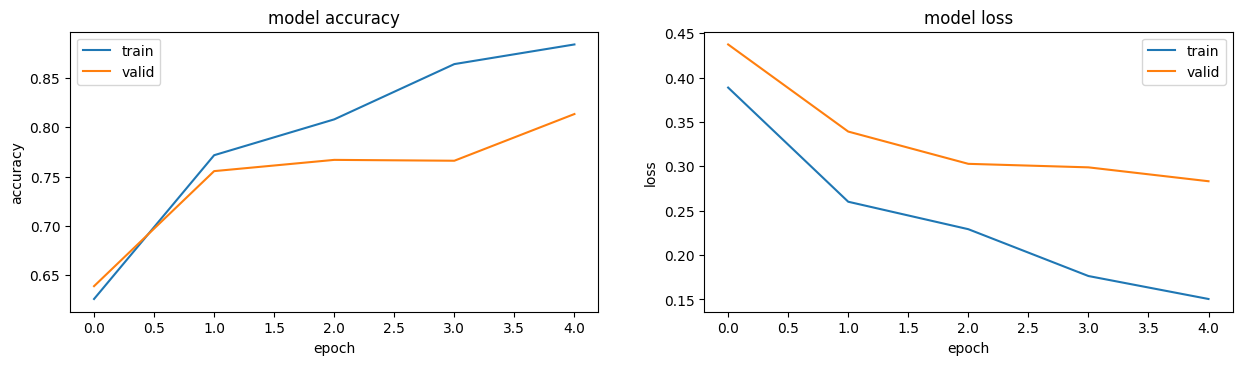

In [ ]:
plotRes(history_1_CNN)

#Build Model_2 (same CNN but With Data Augmentation on FULL DATA):

In [ ]:
train_dir= 'brain-tumor-mri-images/archive (5)/Training'
test_dir = 'brain-tumor-mri-images/archive (5)/Testing'
trainDataGenerator_aug = ImageDataGenerator(rescale=1./255, validation_split=0.2 ,
                                             rotation_range = 0.2 ,##--> Range
                                             shear_range = 0.2 ,##--> Range
                                             zoom_range = 0.2 ,##--> Range
                                             width_shift_range = 0.2 ,##--> Range
                                             height_shift_range = 0.3,##--> Range
                                             horizontal_flip = True)



testDataGenerator = ImageDataGenerator(rescale=1./255)



train_d = trainDataGenerator_aug.flow_from_directory(
     "brain-tumor-mri-images/archive (5)/Training",
      classes=['glioma','meningioma','notumor','pituitary'],
      color_mode="rgb",
      batch_size=16,
      target_size=(64,64),
      class_mode="categorical",
      subset="training")
valid_d = trainDataGenerator_aug.flow_from_directory(
    "brain-tumor-mri-images/archive (5)/Training",
    classes=['glioma','meningioma','notumor','pituitary'],
    color_mode="rgb",
    batch_size=16,
    target_size=(64,64),
    class_mode="categorical",
    subset="validation"
)
test_d = testDataGenerator.flow_from_directory(
    "brain-tumor-mri-images/archive (5)/Testing",
    classes = ['glioma','meningioma','notumor','pituitary'],
    color_mode="rgb",
    target_size=(64,64))



Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
Model_2_CNN_DataAug = tf.keras.Sequential([
    Conv2D(64 * 64 , 3 , input_shape = (64 , 64 , 3), padding = "same" , activation = "relu"),
    MaxPooling2D(pool_size = (2 , 2)),
    Conv2D(64 , 3 , padding = "same" , activation = "relu"),
    Dropout(rate=0.4),
    MaxPooling2D(2),
    Conv2D(32 , 3 , padding = "same" , activation = "relu"),
    Dropout(rate = 0.2),
    MaxPooling2D(2),
    Flatten(),
    Dense(16 , activation = "relu"),
    Dropout(rate = 0.2),
    Dense(4 , activation = "softmax"),
])
Model_2_CNN_DataAug.compile(loss = "binary_crossentropy",
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["accuracy"]
                           )
callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8,monitor="val_accuracy",patience=3)
]


In [ ]:
history_2_CNN_DataAug = Model_2_CNN_DataAug.fit(train_d,validation_data=valid_d,epochs=5,verbose=1,callbacks=callback_list)

Epoch 1/5
286/286 [==============================] - 45s 151ms/step - loss: 0.5428 - accuracy: 0.3640 - val_loss: 0.5258 - val_accuracy: 0.5083 - lr: 0.0010
Epoch 2/5
286/286 [==============================] - 42s 148ms/step - loss: 0.4710 - accuracy: 0.5060 - val_loss: 0.4790 - val_accuracy: 0.6152 - lr: 0.0010
Epoch 3/5
286/286 [==============================] - 43s 151ms/step - loss: 0.4200 - accuracy: 0.5811 - val_loss: 0.4525 - val_accuracy: 0.6687 - lr: 0.0010
Epoch 4/5
286/286 [==============================] - 43s 151ms/step - loss: 0.3746 - accuracy: 0.6379 - val_loss: 0.4216 - val_accuracy: 0.6713 - lr: 0.0010
Epoch 5/5
286/286 [==============================] - 43s 151ms/step - loss: 0.3495 - accuracy: 0.6935 - val_loss: 0.3919 - val_accuracy: 0.6652 - lr: 0.0010


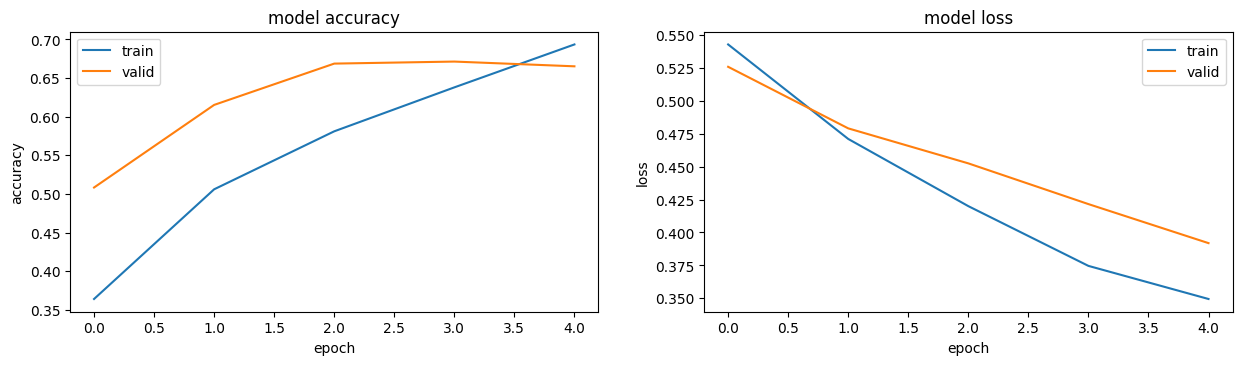

In [ ]:
plotRes(history_2_CNN_DataAug)

#Trying with more Time

In [ ]:
train_dir= 'brain-tumor-mri-images/archive (5)/Training'
test_dir = 'brain-tumor-mri-images/archive (5)/Testing'
trainDataGenerator_aug = ImageDataGenerator(rescale=1./255, validation_split=0.2 ,
                                             rotation_range = 0.2 ,##--> Range
                                             shear_range = 0.2 ,##--> Range
                                             zoom_range = 0.2 ,##--> Range
                                             width_shift_range = 0.2 ,##--> Range
                                             height_shift_range = 0.3,##--> Range
                                             horizontal_flip = True)



testDataGenerator = ImageDataGenerator(rescale=1./255)



train_d = trainDataGenerator_aug.flow_from_directory(
     "brain-tumor-mri-images/archive (5)/Training",
      classes=['glioma','meningioma','notumor','pituitary'],
      color_mode="rgb",
      batch_size=16,
      target_size=(64,64),
      class_mode="categorical",
      subset="training")
valid_d = trainDataGenerator_aug.flow_from_directory(
    "brain-tumor-mri-images/archive (5)/Training",
    classes=['glioma','meningioma','notumor','pituitary'],
    color_mode="rgb",
    batch_size=16,
    target_size=(64,64),
    class_mode="categorical",
    subset="validation"
)
test_d = testDataGenerator.flow_from_directory(
    "brain-tumor-mri-images/archive (5)/Testing",
    classes = ['glioma','meningioma','notumor','pituitary'],
    color_mode="rgb",
    target_size=(64,64))
Model_3_CNN_DataAug = tf.keras.Sequential([
    Conv2D(64 * 64 , 3 , input_shape = (64 , 64 , 3), padding = "same" , activation = "relu"),
    MaxPooling2D(pool_size = (2 , 2)),
    Conv2D(64 , 3 , padding = "same" , activation = "relu"),
    Dropout(rate=0.4),
    MaxPooling2D(2),
    Conv2D(32 , 3 , padding = "same" , activation = "relu"),
    Dropout(rate = 0.2),
    MaxPooling2D(2),
    Flatten(),
    Dense(16 , activation = "relu"),
    Dropout(rate = 0.2),
    Dense(4 , activation = "softmax"),
])
Model_3_CNN_DataAug.compile(loss = "binary_crossentropy",
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["accuracy"]
                           )
callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8,monitor="val_accuracy",patience=3)
]
history_3_CNN_DataAug = Model_3_CNN_DataAug.fit(train_d,validation_data=valid_d,epochs=20,verbose=1,callbacks=callback_list)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Epoch 1/20
286/286 [==============================] - 45s 151ms/step - loss: 0.5664 - accuracy: 0.3562 - val_loss: 0.5471 - val_accuracy: 0.4470 - lr: 0.0010
Epoch 2/20
286/286 [==============================] - 44s 153ms/step - loss: 0.4826 - accuracy: 0.4820 - val_loss: 0.4944 - val_accuracy: 0.5925 - lr: 0.0010
Epoch 3/20
286/286 [==============================] - 44s 153ms/step - loss: 0.4346 - accuracy: 0.5541 - val_loss: 0.4877 - val_accuracy: 0.5329 - lr: 0.0010
Epoch 4/20
286/286 [==============================] - 43s 150ms/step - loss: 0.4080 - accuracy: 0.5942 - val_loss: 0.4171 - val_accuracy: 0.6582 - lr: 0.0010
Epoch 5/20
286/286 [==============================] - 42s 148ms/step - loss: 0.3857 - accuracy: 0.6080 - val_loss: 0.4052 - val_accuracy: 0.6801 - lr: 0.0010
Epoch 6/20
286/286 [==============================] - 42s 148ms/step - loss: 0.3748 

#Trying EfficientNetB0

In [13]:
train_dir= 'brain-tumor-mri-images/archive (5)/Training'
test_dir = 'brain-tumor-mri-images/archive (5)/Testing'
IMG_SIZE = (224 , 224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir ,
    image_size = IMG_SIZE ,
    label_mode = "categorical" ,
    batch_size = BATCH_SIZE ,)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir ,
    image_size = IMG_SIZE ,
    label_mode = "categorical" ,
    batch_size = BATCH_SIZE ,)
callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8,monitor="val_accuracy",patience=3)
]

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [15]:
base_model_1 = tf.keras.applications.EfficientNetB0(include_top = False)
base_model_1.trainable = False
inputs = tf.keras.layers.Input(shape = (224 , 224 , 3) , name = "input_layer")
x = base_model_1(inputs)
x = tf.keras.layers.Conv2D(32 , 3 , padding = "same" , activation = "relu" , name = "Top_Conv_Layer")(x)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_avg_pooling_layer")(x)
outputs = tf.keras.layers.Dense(4 , activation = "softmax" , name = "output_layer")(x)
model_EffNet1 = tf.keras.Model(inputs , outputs)
model_EffNet1.compile(
    loss = tf.keras.losses.categorical_crossentropy ,
    optimizer = tf.keras.optimizers.Adam() ,
    metrics = ['accuracy']
)

#10. Fit the model
model_EffNet_hist = model_EffNet1.fit(train_data,validation_data=test_data,epochs=5,verbose=1,callbacks=callback_list)

Epoch 1/5
179/179 [==============================] - 30s 118ms/step - loss: 0.3858 - accuracy: 0.8480 - val_loss: 0.2421 - val_accuracy: 0.9054 - lr: 0.0010
Epoch 2/5
179/179 [==============================] - 16s 89ms/step - loss: 0.2078 - accuracy: 0.9238 - val_loss: 0.1866 - val_accuracy: 0.9230 - lr: 0.0010
Epoch 3/5
179/179 [==============================] - 19s 102ms/step - loss: 0.1519 - accuracy: 0.9398 - val_loss: 0.1592 - val_accuracy: 0.9321 - lr: 0.0010
Epoch 4/5
179/179 [==============================] - 16s 89ms/step - loss: 0.1107 - accuracy: 0.9629 - val_loss: 0.2025 - val_accuracy: 0.9336 - lr: 0.0010
Epoch 5/5
179/179 [==============================] - 16s 89ms/step - loss: 0.0886 - accuracy: 0.9694 - val_loss: 0.1328 - val_accuracy: 0.9504 - lr: 0.0010


# Fine Tuning

In [16]:
base_model_1.trainable = True

#Freeze all layers except last 10
for layer in base_model_1.layers[:-10]:
  layer.trainable = False

for layer in base_model_1.layers:
  print(layer.name , layer.trainable)

input_2 False
rescaling_2 False
normalization_1 False
rescaling_3 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2b_

In [17]:
model_EffNet1.compile(loss = "categorical_crossentropy" ,
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001), #--< When FineTuning u want to lower the LR by 10x
                metrics = ["accuracy"]
                )

In [ ]:
for layer in base_model_1.layers:
  print(layer.name , layer.trainable)

In [19]:
#Check which layers are tunable
for layer_number , layer in enumerate(model_EffNet1.layers[1].layers):
  print(layer_number , layer.name , layer.trainable)


0 input_2 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [20]:
model_EffNet1.layers[1].layers[-3].name

'top_conv'

In [21]:
#Fine Tune for another 5 epochs
intitial_epochs = 5
fine_tune_epochs = intitial_epochs + 5

#Refit the model
Fine_Tuned_Data_Aug_History = model_EffNet1.fit(train_data , epochs = fine_tune_epochs , validation_data = test_data ,
                                      validation_steps = len(test_data) , initial_epoch = intitial_epochs-1 #--> Start from previous last epoch
                                    )




Epoch 5/10
179/179 [==============================] - 28s 101ms/step - loss: 0.0854 - accuracy: 0.9702 - val_loss: 0.0993 - val_accuracy: 0.9565
Epoch 6/10
179/179 [==============================] - 18s 97ms/step - loss: 0.0510 - accuracy: 0.9849 - val_loss: 0.0800 - val_accuracy: 0.9664
Epoch 7/10
179/179 [==============================] - 16s 90ms/step - loss: 0.0413 - accuracy: 0.9870 - val_loss: 0.0922 - val_accuracy: 0.9649
Epoch 8/10
179/179 [==============================] - 17s 92ms/step - loss: 0.0331 - accuracy: 0.9909 - val_loss: 0.0724 - val_accuracy: 0.9687
Epoch 9/10
179/179 [==============================] - 17s 91ms/step - loss: 0.0319 - accuracy: 0.9905 - val_loss: 0.0608 - val_accuracy: 0.9786
Epoch 10/10
179/179 [==============================] - 19s 103ms/step - loss: 0.0214 - accuracy: 0.9947 - val_loss: 0.0659 - val_accuracy: 0.9733


In [22]:
#Fine Tune for another 3 epochs
fine_tune_epochs = intitial_epochs+ 4 + 3

#Refit the model
Fine_Tuned_Data_Aug_History = model_EffNet1.fit(train_data , epochs = fine_tune_epochs , validation_data = test_data ,
                                      validation_steps = len(test_data) , initial_epoch = intitial_epochs+4 #--> Start from previous last epoch
                                    )




Epoch 10/12
179/179 [==============================] - 18s 95ms/step - loss: 0.0161 - accuracy: 0.9968 - val_loss: 0.0554 - val_accuracy: 0.9779
Epoch 11/12
179/179 [==============================] - 17s 91ms/step - loss: 0.0203 - accuracy: 0.9942 - val_loss: 0.0556 - val_accuracy: 0.9771
Epoch 12/12
179/179 [==============================] - 17s 91ms/step - loss: 0.0152 - accuracy: 0.9960 - val_loss: 0.0569 - val_accuracy: 0.9786


In [23]:
#Fine Tune for another 3 epochs
fine_tune_epochs = intitial_epochs+ 4 + 7

#Refit the model
Fine_Tuned_Data_Aug_History = model_EffNet1.fit(train_data , epochs = fine_tune_epochs , validation_data = test_data ,
                                      validation_steps = len(test_data) , initial_epoch = intitial_epochs+8 #--> Start from previous last epoch
                                    )



Epoch 14/16
179/179 [==============================] - 18s 94ms/step - loss: 0.0140 - accuracy: 0.9960 - val_loss: 0.0611 - val_accuracy: 0.9764
Epoch 15/16
179/179 [==============================] - 17s 91ms/step - loss: 0.0139 - accuracy: 0.9965 - val_loss: 0.0609 - val_accuracy: 0.9764
Epoch 16/16
179/179 [==============================] - 17s 92ms/step - loss: 0.0121 - accuracy: 0.9954 - val_loss: 0.0556 - val_accuracy: 0.9794


In [24]:
#ReCompile
model_EffNet1.compile(loss = "categorical_crossentropy" ,
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00001), #--< When FineTuning u want to lower the LR by 10x
                metrics = ["accuracy"]
                )


In [25]:
fine_tune_epochs = intitial_epochs+ 4 + 7 +1

#Refit the model
Fine_Tuned_Data_Aug_History = model_EffNet1.fit(train_data , epochs = fine_tune_epochs , validation_data = test_data ,
                                      validation_steps = len(test_data) , initial_epoch = intitial_epochs+9 #--> Start from previous last epoch
                                    )

Epoch 15/17
179/179 [==============================] - 28s 100ms/step - loss: 0.0091 - accuracy: 0.9977 - val_loss: 0.0423 - val_accuracy: 0.9847
Epoch 16/17
179/179 [==============================] - 17s 96ms/step - loss: 0.0084 - accuracy: 0.9981 - val_loss: 0.0413 - val_accuracy: 0.9847
Epoch 17/17
179/179 [==============================] - 16s 90ms/step - loss: 0.0077 - accuracy: 0.9982 - val_loss: 0.0460 - val_accuracy: 0.9825


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

from skimage.io import imread, imsave
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.applications import vgg16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow_datasets as tfds
import tensorflow_hub as hub

import imgaug as ia
from imgaug import augmenters as iaa

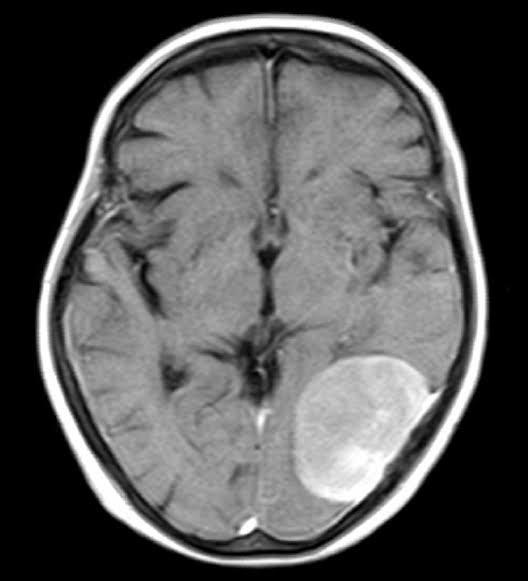

In [27]:
last_conv_layer_name = "Top_Conv_Layer"
img_path = "/content/brain-tumor-mri-images/archive (5)/Testing/meningioma/Te-meTr_0004.jpg"
display(Image(img_path))


In [73]:
def get_img_array(img_path, size = (224 , 224)):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4 , view = False):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    if view :
      display(Image(cam_path))
def decode_predictions(preds):
  classes = ['Glioma' , 'meningioma' , 'No Tumor' , 'Pituitary']
  prediction = classes[np.argmax(preds)]
  return prediction

def make_prediction (img_path , model = model_EffNet1 , last_conv_layer_name = "Top_Conv_Layer" , campath = "cam.jpeg" , view = False):
  img = get_img_array(img_path = img_path)
  img_array = get_img_array(img_path, size=(224 , 224))
  preds = model_EffNet1.predict(img_array)
  heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
  save_and_display_gradcam(img_path, heatmap , cam_path=campath , view = view)
  return [campath , decode_predictions(preds)]

def Plot_prediction (path , campath):


In [83]:
  import matplotlib.image as img
  campath , prediction = make_prediction("/content/brain-tumor-mri-images/archive (5)/Testing/pituitary/Te-pi_0279.jpg" , campath="123.jpeg")
  print(prediction)
  test_img = img.imread(campath)
  plt.imshow(test_img)
  plt.title(prediction)
  plt.axis("off")

1/1 [==============================] - 0s 45ms/step
Pituitary


1/1 [==============================] - 0s 49ms/step


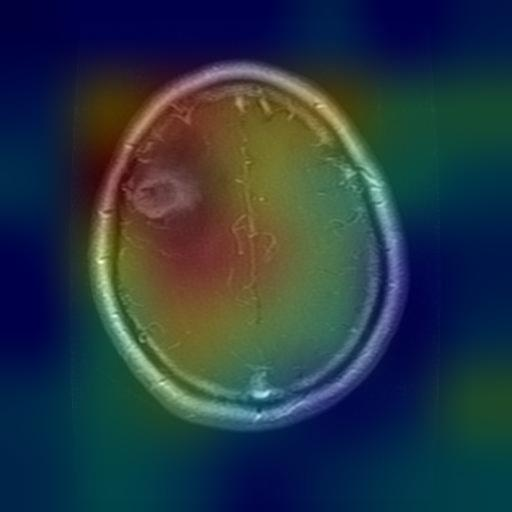

['123.jpeg', 'Glioma']

In [172]:
make_prediction("/content/brain-tumor-mri-images/archive (5)/Training/glioma/Tr-gl_0084.jpg" , campath="123.jpeg" , view = True)

1/1 [==============================] - 0s 28ms/step


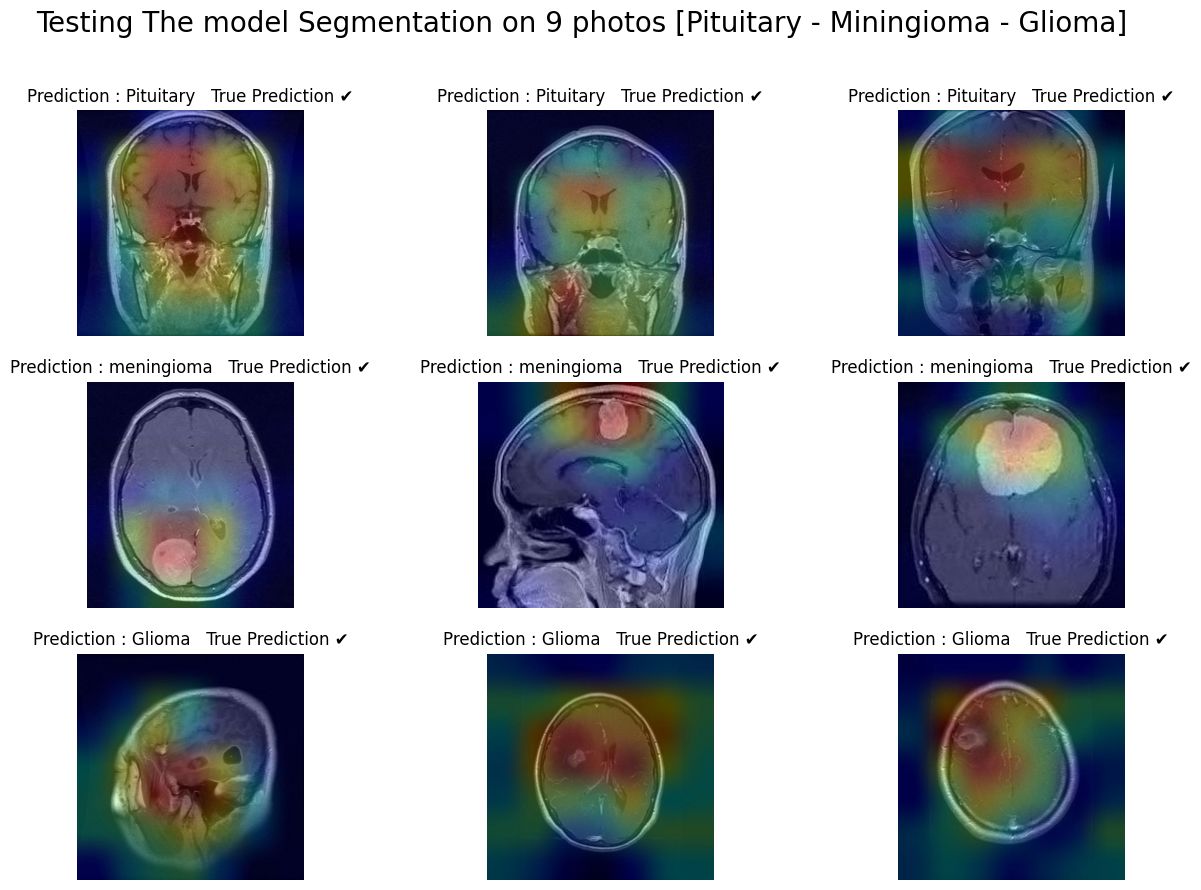

In [186]:
path_array = [
  '/content/brain-tumor-mri-images/archive (5)/Testing/pituitary/Te-pi_0070.jpg' ,
  '/content/brain-tumor-mri-images/archive (5)/Testing/pituitary/Te-pi_0050.jpg' ,
  '/content/brain-tumor-mri-images/archive (5)/Testing/pituitary/Te-pi_0051.jpg' ,
  '/content/brain-tumor-mri-images/archive (5)/Testing/meningioma/Te-me_0010.jpg' ,
  '/content/brain-tumor-mri-images/archive (5)/Testing/meningioma/Te-me_0056.jpg' ,
  '/content/brain-tumor-mri-images/archive (5)/Testing/meningioma/Te-me_0095.jpg' ,
  '/content/brain-tumor-mri-images/archive (5)/Training/glioma/Tr-gl_0049.jpg' ,
  '/content/brain-tumor-mri-images/archive (5)/Training/glioma/Tr-gl_0076.jpg' ,
  '/content/brain-tumor-mri-images/archive (5)/Training/glioma/Tr-gl_0084.jpg' ,

]


fig = plt.figure(figsize=(15, 10))
fig.suptitle("Testing The model Segmentation on 9 photos [Pituitary - Miningioma - Glioma]" , fontsize = 20)
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        campath , prediction = make_prediction(path_array[i] , campath=f"{i}.jpeg")
        test_img = img.imread(campath)
        plt.imshow(test_img)
        plt.title("Prediction : " + prediction + "   True Prediction ✔")
        plt.axis("off")